In [2]:
data <- read.csv(file.path("..","data","training_data.csv"))
data <- na.omit(data)
dim(data)
head(data)


[1]  708 4872

Intensity,VALENCE.PLEASANTNESS,SWEETORSOUR,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,...,Psychotic.80,Psychotic.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
low,45,FALSE,302.0,208.33,5.952,19.698,34.491,21.523,39.571,...,0,0,1,0,1,0,1,0,1,0
high,49,TRUE,72.6,122.18,6.431,11.349,18.745,12.261,21.285,...,0,0,0,0,0,0,0,0,0,0
high,56,TRUE,259.0,242.29,7.572,20.832,32.167,21.693,35.535,...,0,0,1,0,1,1,1,0,1,1
high,7,FALSE,56.6,88.12,6.294,7.537,14.189,7.955,16.080,...,0,0,0,0,0,0,0,0,0,0
low,51,FALSE,84.7,136.21,6.191,12.876,21.629,14.023,24.701,...,0,0,0,0,0,0,0,0,0,0
high,21,FALSE,160.0,192.28,6.409,17.644,29.723,19.000,33.740,...,0,0,0,0,1,0,1,0,1,0


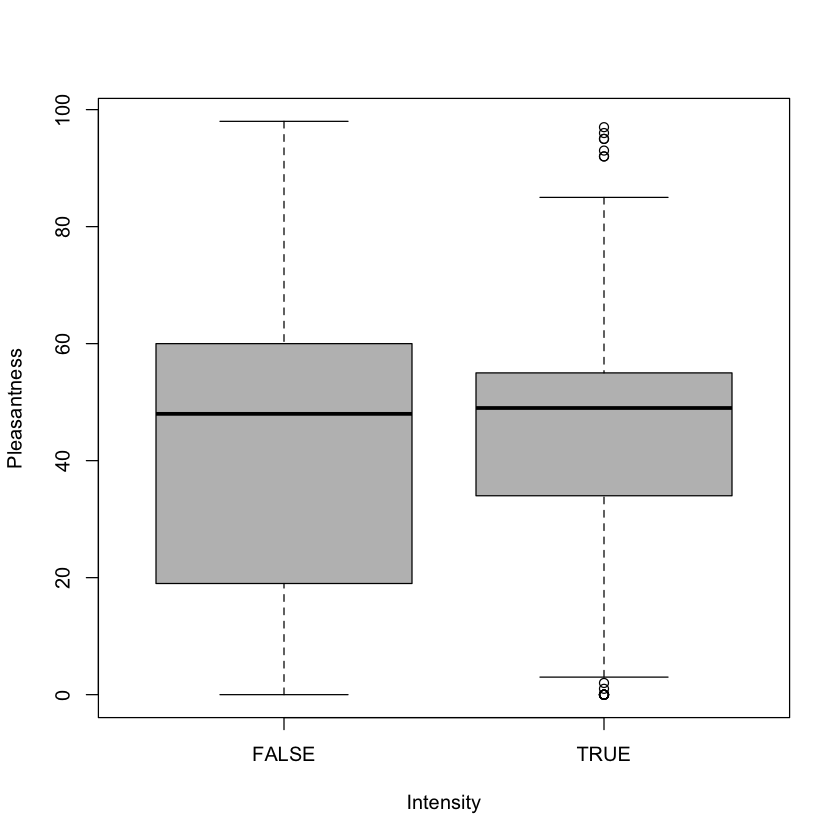

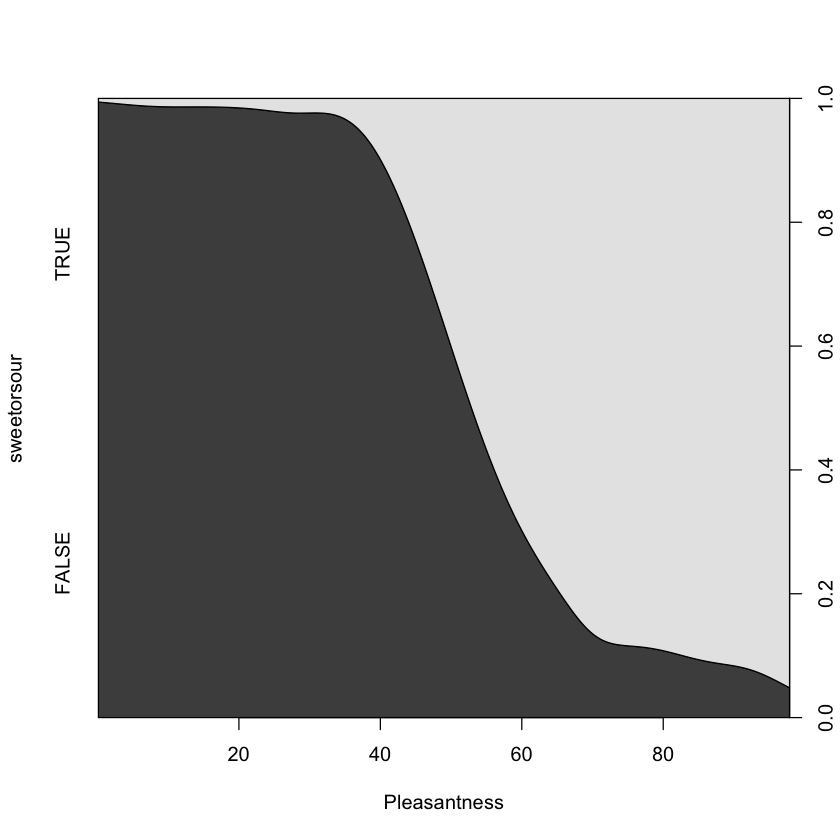

In [4]:
#plot pleasantness en fonction some features (intensity)

plot(data$Intensity, data$VALENCE.PLEASANTNESS, xlab='Intensity', ylab='Pleasantness', col='gray', xaxt='n', )
axis(1,c(1,2),c("FALSE","TRUE"))


sweetorsour<- factor(data$SWEETORSOUR)
cdplot( sweetorsour ~ data$VALENCE.PLEASANTNESS, xlab= 'Pleasantness')


interpretation : 

--> on peut voir que sweet or sour devient true quqnd pleasantness augmente . 

In [5]:
#tire des datas : bougeons les collones avec var = 0 and colonnea correlée  .
data <- data[, which(apply(data, 2, var)!=0)] 
cormat<- cor(data)
seuil <- 0.7


c<- colnames(cormat)[!apply((lower.tri(cormat) & abs(cormat)>=seuil),2,any)] #lower.tri bc cormat matrice symetrique.
data<-data[, c]
data<-na.omit(data)
dim(data)
head(data)

Warning message in FUN(newX[, i], ...):
“NAs introduits lors de la conversion automatique”Warning message in FUN(newX[, i], ...):
“NAs introduits lors de la conversion automatique”

[1] 708 240

VALENCE.PLEASANTNESS,D.Dtr04,D.Dtr09,D.Dtr10,PJI2,Psi_e_1d,X3A,X4A,X5A,X5Av,...,DLS_07,DLS_cons,LLS_01,LLS_02,Depressant.80,Hypertens.80,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
45,29.122,0,0,1.0,0.001,0.173,0.111,0.069,0.048,...,1,1.00,0.67,1,0,1,1,0,1,0
49,0.000,0,0,1.0,-0.048,0.226,0.145,0.098,0.031,...,1,0.84,1.00,1,0,0,0,0,0,0
56,0.000,0,0,1.0,0.000,0.198,0.135,0.091,0.025,...,1,0.87,0.67,1,1,1,1,0,1,1
7,0.000,0,0,0.5,-0.414,0.333,0.000,0.000,0.000,...,1,0.95,1.00,1,0,0,0,0,0,0
51,0.000,0,0,1.0,0.026,0.221,0.145,0.101,0.037,...,1,0.84,1.00,1,0,0,0,0,0,0
21,0.000,0,0,1.0,0.002,0.234,0.153,0.106,0.042,...,1,0.95,0.83,1,0,0,1,0,1,0


Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“1  linear dependencies found”

Reordering variables and trying again:


Warning message in rval$lopt[] <- rval$vorder[rval$lopt]:
“le nombre d'objets à remplacer n'est pas multiple de la taille du remplacement”

[1] 708  96

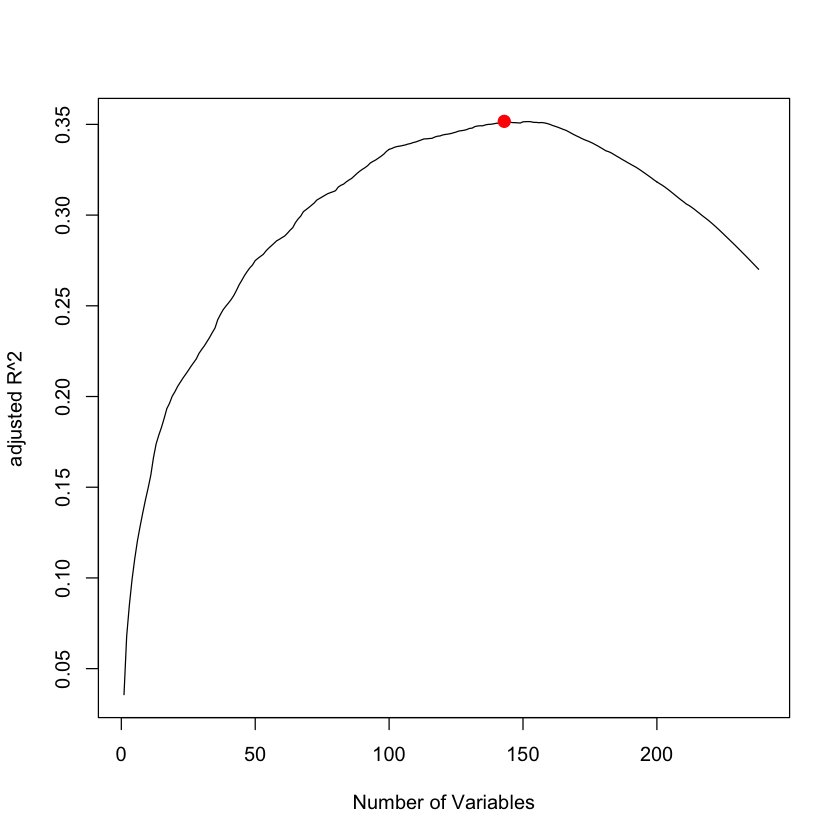

In [19]:
#Feature Engineering : foward regression create new data
library(leaps)


regfit.fwd <- regsubsets(data$VALENCE.PLEASANTNESS ~ . , data=data, method = "forward", nvmax = 240)

# plot
plot(regfit.fwd.summary$adjr2, type = "l", xlim = c(1,240),
     xlab = "Number of Variables", ylab = "adjusted R^2")
adjr2.max <- which.max(regfit.fwd.summary$adjr2)
points(adjr2.max, regfit.fwd.summary$adjr2[adjr2.max], col = "red", cex = 2, pch = 20)

data_ <- data[, which(regfit.fwd.summary$which[adjr2.max, ]==0)] 
dim(data_)

Warning message:
“In prcomp.default(data.sc, data = F) :
 extra argument ‘data’ will be disregarded”

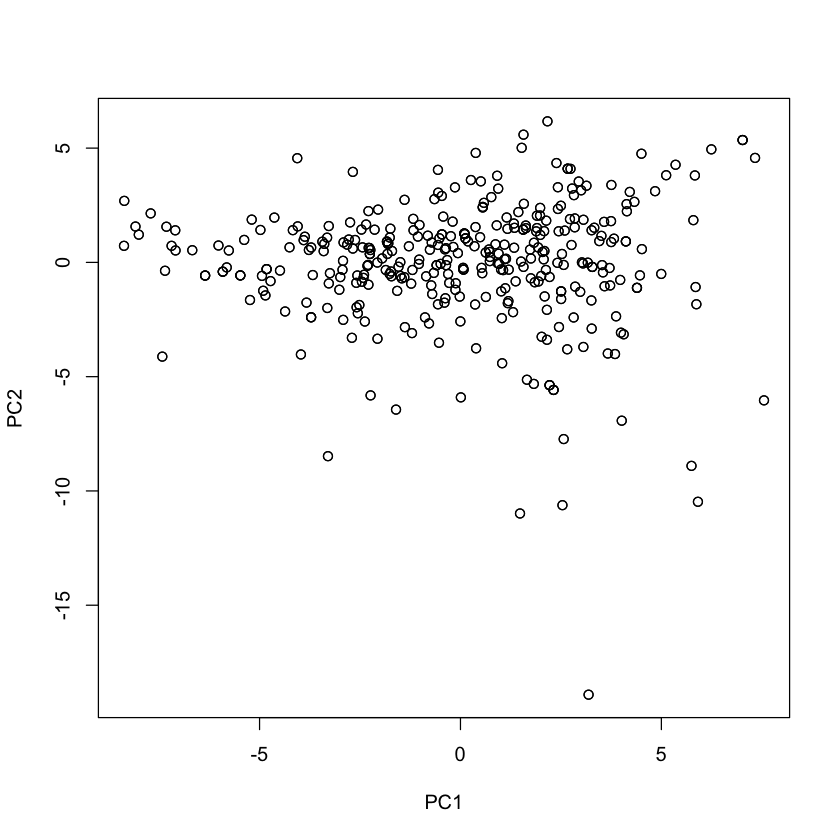

In [20]:
#PCA with new_data

data.sc <- scale(data_[, -1]) #remove  prediction data()
pca <- prcomp(data.sc, data= F)
plot(pca$x[,1:2])

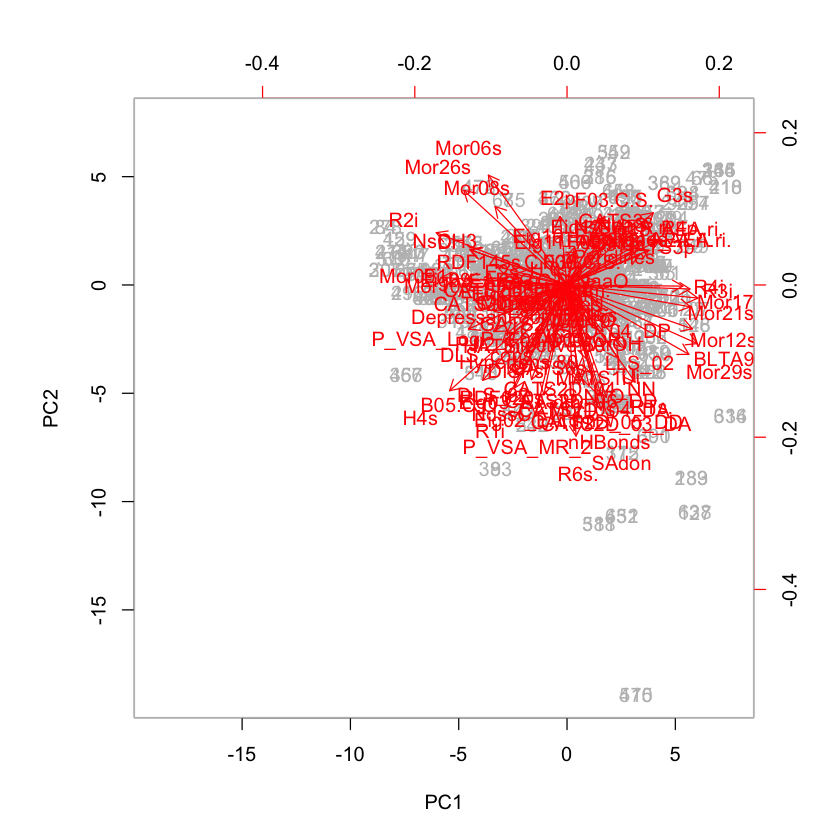

In [21]:
biplot(pca, col = c('gray', 'red'), scale = 0)

In [23]:
s <- svd(data.sc)
sum((s$v - pca$rotation)^2)
sum((s$u %*% diag(s$d) - pca$x)^2)

[1] 1.946871e-25

[1] 8.299443e-23

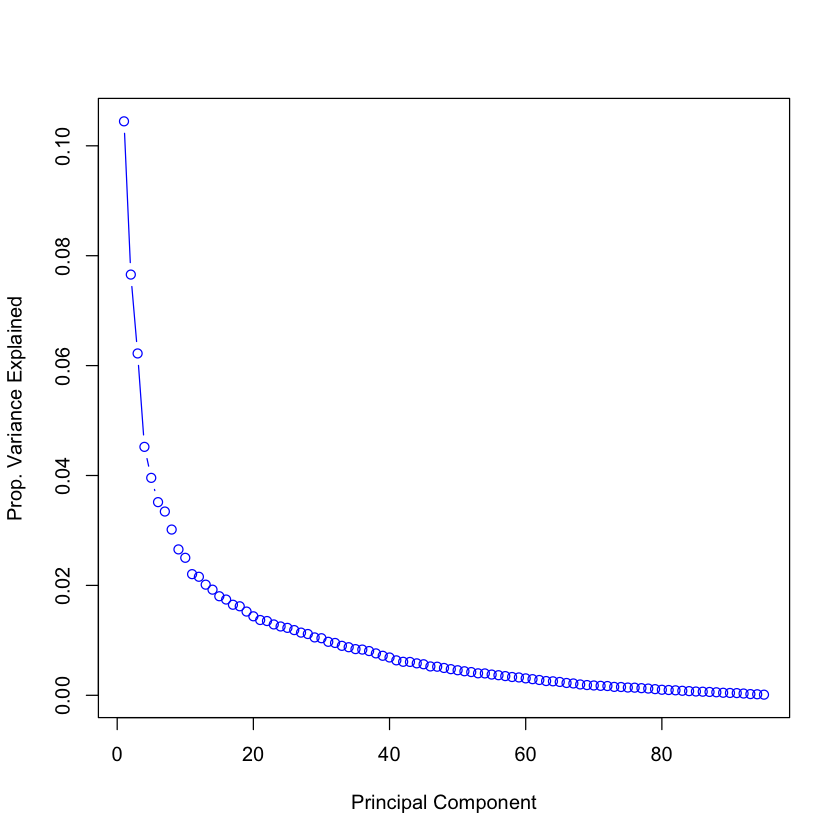

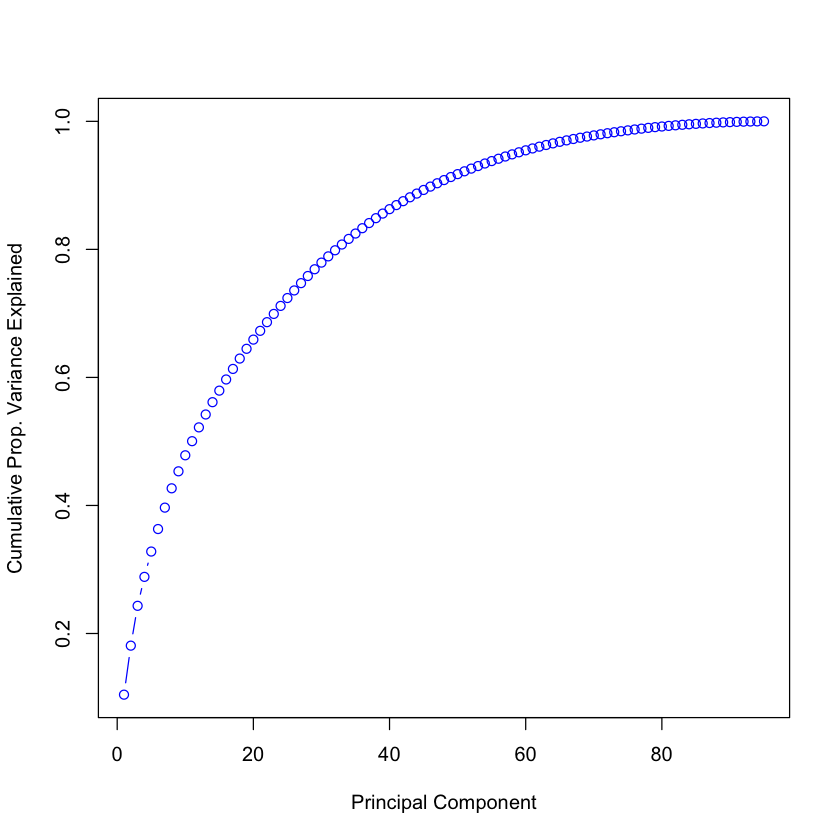

In [24]:
pca.var <- pca$sdev^2
pca.vare <- pca.var / sum(pca.var)
plot(pca.vare, xlab = "Principal Component", ylab = "Prop. Variance Explained", col = "blue", type = "b")
plot(cumsum(pca.vare), xlab = "Principal Component", ylab = "Cumulative Prop. Variance Explained", col = "blue", type = "b")

--> on voit clairement que PC ne sont pas suffisante pour representer les données . 

In [5]:
#divide into training and test set 
set.seed(1)
idx.train <- sample(nrow(data), nrow(data)*3/4)
data.train <- data[idx.train,]
data.test <- data[-idx.train,]

ERROR: Error in sample.int(length(x), size, replace, prob): argument 'size' incorrect


In [6]:
#perform linear multiple regression on the trainig set 
lm.fit <- lm(data.train$VALENCE.PLEASANTNESS ~ ., data = data.train) 
summary(lm.fit)



ERROR: Error in is.data.frame(data): objet 'data.train' introuvable


In [22]:
# compare with the test set 
lm.fit <- lm(data.test$VALENCE.PLEASANTNESS ~ ., data = data.test) 
summary(lm.fit)


Call:
lm(formula = data.test$VALENCE.PLEASANTNESS ~ ., data = data.test)

Residuals:
   Min     1Q Median     3Q    Max 
   -20      0      0      0     20 

Coefficients: (89 not defined because of singularities)
                Estimate Std. Error t value Pr(>|t|)  
(Intercept)     328.6802  1877.8825   0.175   0.8624  
D.Dtr04          -6.1243     5.4518  -1.123   0.2715  
D.Dtr09          -1.5576    12.4142  -0.125   0.9011  
D.Dtr10           0.1916     4.9078   0.039   0.9692  
PJI2             41.3480    87.4285   0.473   0.6402  
Psi_e_1d        -37.8293    62.5849  -0.604   0.5508  
X3A             853.0935   618.7120   1.379   0.1797  
X4A              89.4497   320.0896   0.279   0.7821  
X5A            -135.5077   343.3260  -0.395   0.6963  
X5Av           -186.2095   550.6554  -0.338   0.7380  
CIC5            -51.9550    34.3314  -1.513   0.1423  
J_Dz.p.          19.2865    61.7766   0.312   0.7574  
J_Dz.i.        -117.4230    70.7328  -1.660   0.1089  
MATS1i         

**INTERPRETATION :**

multiple R-squared for training set : 0.5673

multiple R-squared for test set : 0.9559

So this model is too flexible ? 



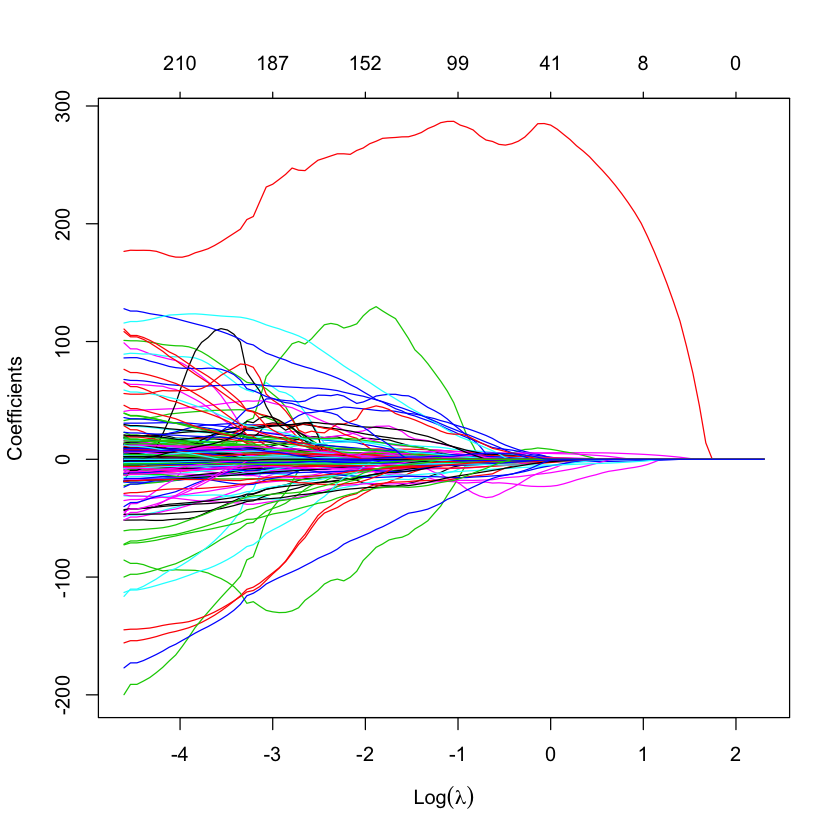

In [61]:
#LASSO L1-REGULARIZATION 

v<-c(colnames(data.train[2:240]))
library(glmnet)
x <- as.matrix(data.train[,v])
y <- data.train$VALENCE.PLEASANTNESS
lasso.mod <- glmnet(x, y, alpha = 1, lambda = 10^seq(1, -2, length = 100))
plot(lasso.mod, "lambda", xlab = parse(text = "Log(lambda)"))

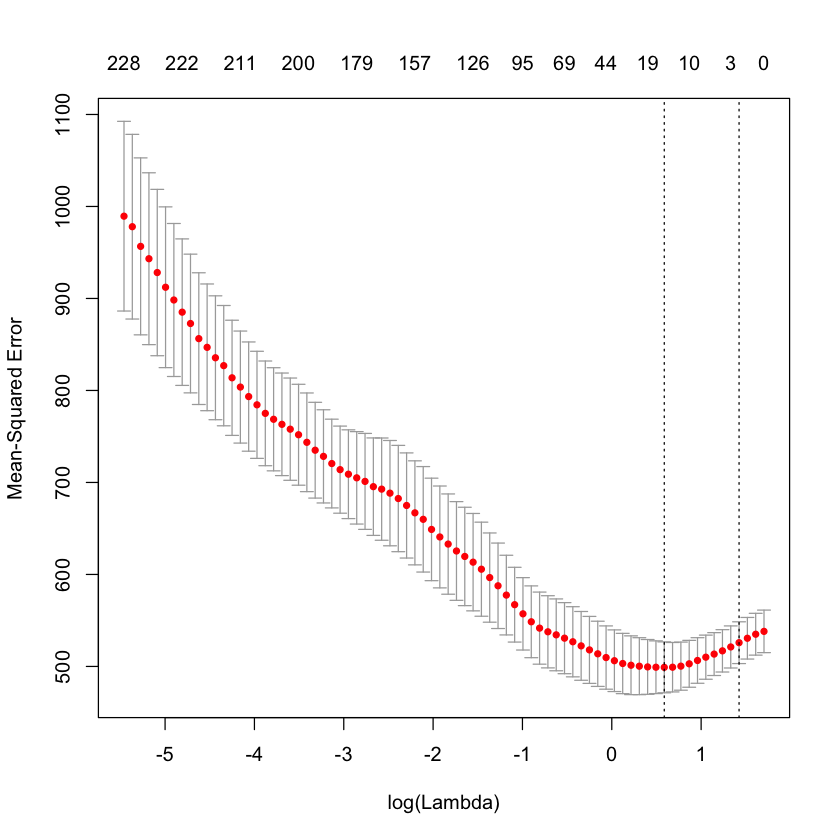

In [62]:
cv.lasso <- cv.glmnet(x, y, alpha = 1, nfold = 10)
plot(cv.lasso)

In [63]:
best.lasso <- glmnet(x, y, alpha = 1, lambda = cv.lasso$lambda.min)
coef(best.lasso)

240 x 1 sparse Matrix of class "dgCMatrix"
                        s0
(Intercept)    45.64100262
D.Dtr04         .         
D.Dtr09         .         
D.Dtr10         .         
PJI2            .         
Psi_e_1d        .         
X3A           -10.97728769
X4A             .         
X5A             .         
X5Av            .         
CIC5           -1.84361705
J_Dz.p.         .         
J_Dz.i.         .         
MATS1i          .         
MATS8i          .         
GATS1i          .         
GATS2i          .         
GATS3i          .         
GATS1s          .         
GATS3s          .         
GATS4s          .         
GATS5s          .         
GATS6s          .         
JGI3            .         
JGI4            .         
JGI5            .         
JGI6          242.93500214
JGI7            .         
P_VSA_LogP_2    .         
P_VSA_LogP_3    .         
P_VSA_MR_2      .         
P_VSA_MR_7     -0.05507424
SpMAD_AEA.dm.   .         
Eig02_EA.dm.    .         
Eig03_EA.dm.

The coefficient found are much smaller than the ones with multilinear regression 